In [33]:
import warnings
import datetime
import re
import itertools
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [34]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [35]:
df = pd.read_csv(r"C:\Users\gibra\Desktop\First Semester\IE 550\project\HT.csv",)

print (df)
shape=df.shape
print(shape)
print(shape[0])

         Product_Code Warehouse Product_Category        Date  Order_Demand
0        Product_0001    Whse_A     Category_005    1/3/2012           200
1        Product_0001    Whse_A     Category_005    1/3/2012           800
2        Product_0001    Whse_A     Category_005    1/4/2012           200
3        Product_0001    Whse_A     Category_005    1/9/2012          2000
4        Product_0001    Whse_A     Category_005   1/10/2012          2000
5        Product_0001    Whse_A     Category_005   1/10/2012          1000
6        Product_0001    Whse_A     Category_005   1/30/2012           200
7        Product_0001    Whse_A     Category_005    2/6/2012          3000
8        Product_0001    Whse_A     Category_005   2/20/2012          1000
9        Product_0001    Whse_A     Category_005   2/21/2012          3000
10       Product_0001    Whse_A     Category_005   2/27/2012           400
11       Product_0001    Whse_A     Category_005   2/28/2012          3000
12       Product_0001    

In [36]:
#finding the product with the maximum instances
count = df.groupby('Product_Code').count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    test = count.sort_values('Order_Demand', ascending=False) #Product count data of data per instances of demand
    print(test)

              Warehouse  Product_Category   Date  Order_Demand
Product_Code                                                  
Product_1295      10575             10575  10575         10575
Product_1378       9770              9770   9770          9770
Product_0620       9428              9428   9428          9428
Product_1286       8888              8888   8888          8888
Product_1382       8619              8619   8619          8619
Product_1453       8503              8503   8503          8503
Product_1294       8384              8384   8384          8384
Product_1377       7872              7872   7872          7872
Product_1287       7829              7829   7829          7829
Product_1274       7048              7048   7048          7048
Product_1016       6571              6571   6571          6571
Product_1248       6348              6348   6348          6348
Product_0613       6079              6079   6079          6079
Product_1241       5476              5476   5476       

In [37]:
#removing null values
df.head()
df2 = df
df2 = df2.dropna()
df2.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [38]:
df3 = df2[df2.Order_Demand > 0]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031639 entries, 0 to 1031638
Data columns (total 5 columns):
Product_Code        1031639 non-null object
Warehouse           1031639 non-null object
Product_Category    1031639 non-null object
Date                1020400 non-null object
Order_Demand        1031639 non-null int64
dtypes: int64(1), object(4)
memory usage: 39.4+ MB


In [40]:
#having dataframe with the product having maximum instances
df5 = df3.loc[df3['Product_Code'] == 'Product_1295']

In [41]:
result = df5.dtypes
print(result)

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand         int64
dtype: object


In [42]:
#converting time to datetime format
df5['Date'] = pd.to_datetime(df5['Date'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10443 entries, 546879 to 557453
Data columns (total 5 columns):
Product_Code        10443 non-null object
Warehouse           10443 non-null object
Product_Category    10443 non-null object
Date                10443 non-null datetime64[ns]
Order_Demand        10443 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 489.5+ KB


In [43]:
print(df5)

        Product_Code Warehouse Product_Category       Date  Order_Demand
546879  Product_1295    Whse_J     Category_019 2012-01-05         10000
546880  Product_1295    Whse_J     Category_019 2012-01-05         20000
546881  Product_1295    Whse_J     Category_019 2012-01-05         20000
546882  Product_1295    Whse_J     Category_019 2012-01-05           100
546883  Product_1295    Whse_J     Category_019 2012-01-05           600
546884  Product_1295    Whse_J     Category_019 2012-01-05          3000
546885  Product_1295    Whse_J     Category_019 2012-01-05          5000
546886  Product_1295    Whse_J     Category_019 2012-01-05         20000
546887  Product_1295    Whse_J     Category_019 2012-01-06           100
546888  Product_1295    Whse_J     Category_019 2012-01-06          2000
546889  Product_1295    Whse_J     Category_019 2012-01-06         40000
546890  Product_1295    Whse_J     Category_019 2012-01-06          1000
546891  Product_1295    Whse_J     Category_019 201

In [44]:
df5 = df5.set_index('Date')
df5.index

DatetimeIndex(['2012-01-05', '2012-01-05', '2012-01-05', '2012-01-05',
               '2012-01-05', '2012-01-05', '2012-01-05', '2012-01-05',
               '2012-01-06', '2012-01-06',
               ...
               '2016-12-26', '2016-12-26', '2016-12-26', '2016-12-27',
               '2016-12-27', '2016-12-27', '2016-12-27', '2016-12-27',
               '2016-12-28', '2016-12-28'],
              dtype='datetime64[ns]', name='Date', length=10443, freq=None)

In [45]:
df6 = df5['Order_Demand'].resample('MS').mean()
df6['2016':]

Date
2016-01-01    12909.395973
2016-02-01    11517.901235
2016-03-01    15416.279070
2016-04-01    17469.718310
2016-05-01    13142.537313
2016-06-01    15104.487179
2016-07-01    14197.777778
2016-08-01    15832.307692
2016-09-01    14515.068493
2016-10-01    14528.387097
2016-11-01    14250.847458
2016-12-01    16956.000000
Freq: MS, Name: Order_Demand, dtype: float64

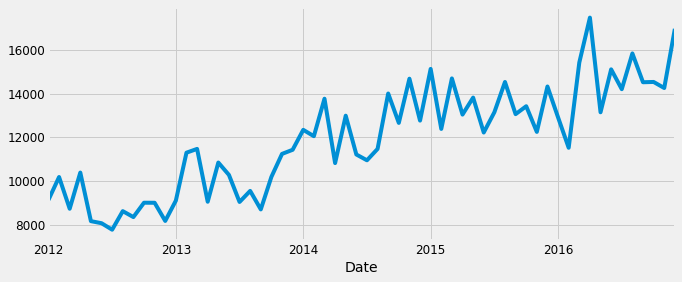

In [46]:
df8 = df6.loc['2012-01-01':'2016-12-01']
df8.plot(figsize=(10, 4))
plt.show()

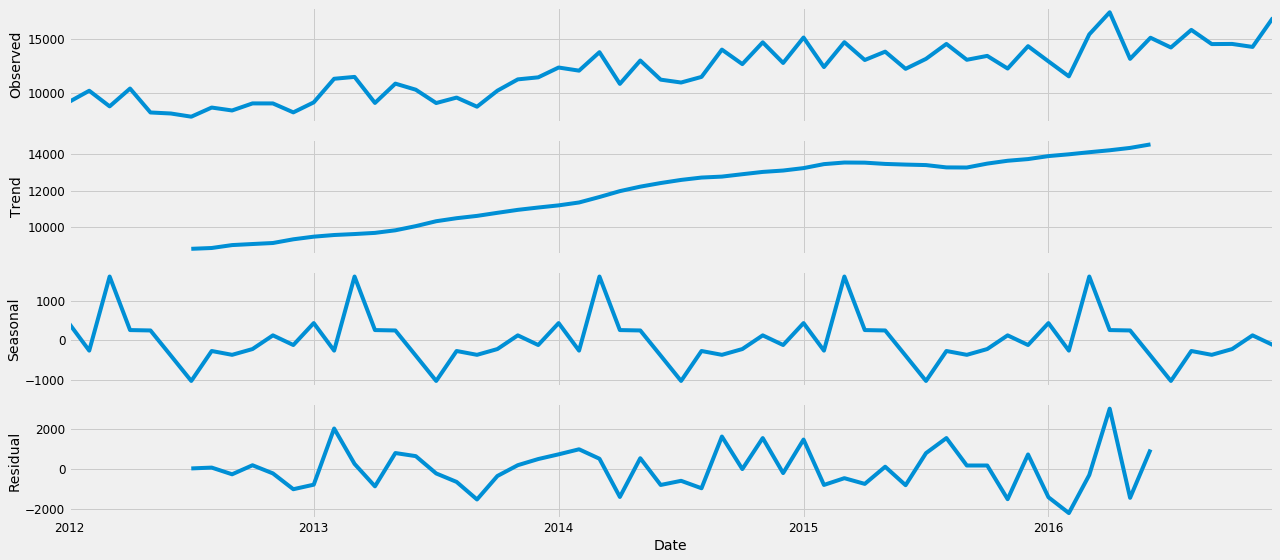

In [47]:
#plotting the components of time-series
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df8, model='additive')
fig = decomposition.plot()
plt.show()

In [48]:
df20 = pd.DataFrame({'Date':df8.index, 'Order_Demand':df8.values})
df20 = df20.set_index('Date')
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df20['Order_Demand'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.765459
p-value                         0.829058
#Lags Used                      7.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [49]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df8)

KPSS Statistic: 0.5930735766349906
p-value: 0.023266038487728125
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [50]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
#finding AIC to train the SARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df8, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}1 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)1 - AIC:1279.8304848164912
ARIMA(0, 0, 0)x(0, 0, 1, 12)1 - AIC:1003.4485220514447
ARIMA(0, 0, 0)x(0, 1, 0, 12)1 - AIC:855.7951525225467
ARIMA(0, 0, 0)x(0, 1, 1, 12)1 - AIC:1404.1459360560882
ARIMA(0, 0, 0)x(1, 0, 0, 12)1 - AIC:850.649657997894
ARIMA(0, 0, 0)x(1, 0, 1, 12)1 - AIC:835.5243591922036
ARIMA(0, 0, 0)x(1, 1, 0, 12)1 - AIC:653.9594055110545
ARIMA(0, 0, 0)x(1, 1, 1, 12)1 - AIC:1276.3062831457921
ARIMA(0, 0, 1)x(0, 0, 0, 12)1 - AIC:1223.5945756308747
ARIMA(0, 0, 1)x(0, 0, 1, 12)1 - AIC:923.9913098779803
ARIMA(0, 0, 1)x(0, 1, 0, 12)1 - AIC:834.3631282180045
ARIMA(0, 0, 1)x(0, 1, 1, 12)1 - AIC:1266.3436688415447
ARIMA(0, 0, 1)x(1, 0, 0, 12)1 - AIC:852.619790990872
ARIMA(0, 0, 1)x(1, 0, 1, 12)1 - AIC:959.9753331633661
ARIMA(0, 0, 1)x(1, 1, 0, 12)1 - AIC:654.9017044827253
ARIMA(0, 0, 1)x(1, 1, 1, 12)1 - AIC:1446.3150969788958
ARIMA(0, 1, 0)x(0, 0, 0, 12)1 - AIC:1027.8459023254238
ARIMA(0, 1, 0)x(0, 0, 1, 12)1 - AIC:820.7348439468283
ARIMA(0, 1, 0)x(0, 1, 

In [52]:
#training the model with least AIC value
mod = sm.tsa.statespace.SARIMAX(df8,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2133      0.251     -0.851      0.395      -0.705       0.278
ma.L1         -0.7297      0.126     -5.805      0.000      -0.976      -0.483
ar.S.L12      -0.2160      0.234     -0.922      0.357      -0.675       0.243
sigma2      2.432e+06   5.35e+05      4.542      0.000    1.38e+06    3.48e+06


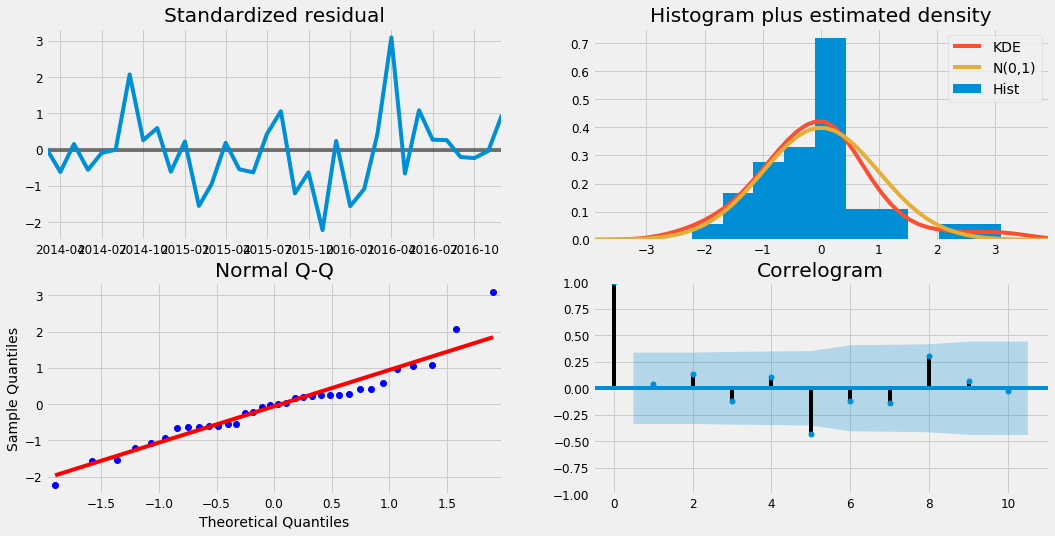

In [53]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

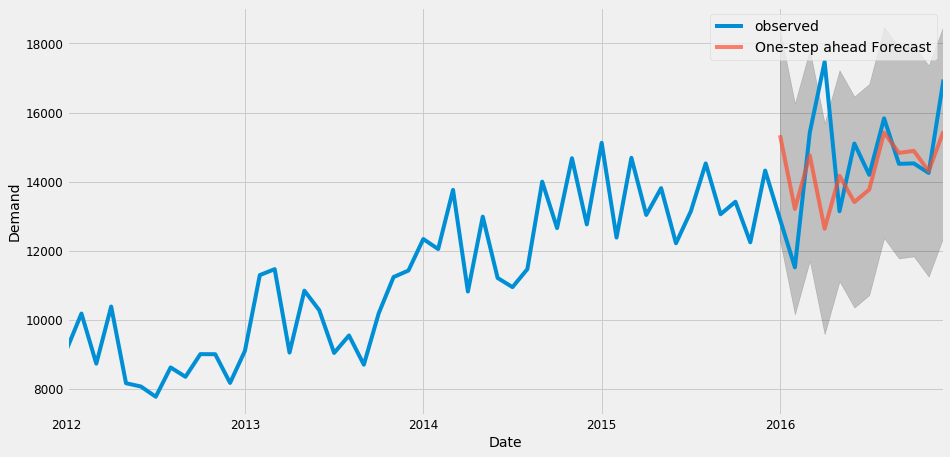

In [54]:
#validating the SARIMA model with the present data of year 2016
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df8['2012-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2,)

ax.set_xlabel('Date')
ax.set_ylabel('Demand')
plt.legend()
plt.show()

In [55]:
df8_forecasted = pred.predicted_mean
df8_truth = df8['2016-01-01':]
mse = ((df8_forecasted - df8_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3277197.12


In [56]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1810.3


In [57]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = df8_truth
y_pred = df8_forecasted
mean_absolute_percentage_error(y_true, y_pred)

8.66787734793647

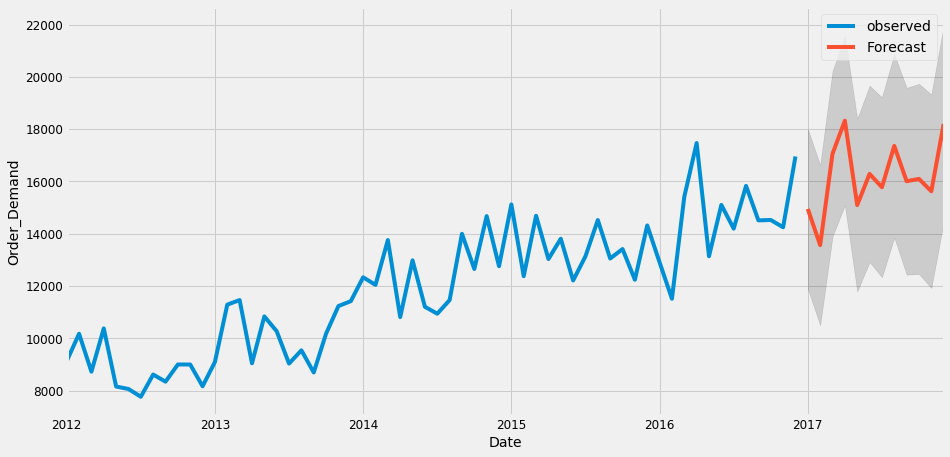

In [58]:
#forecasting the demand data for the following year 2017
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = df8.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')

plt.legend()
plt.show()